In [10]:
import pandas as pd


csv_file = 'benchmark.csv'
df = pd.read_csv(csv_file, index_col=None)
df = df.round(2)

In [11]:
# eject index -1
df = df[df["index"] != -1]
df

,task,index,train_size,testset_size,vit_tiny_head_3,vit_small_head_6,vit_base_head_9
1,total_label(s+m),0,809,5823,38.11,47.12,43.98
2,total_label(s+m),1,1011,5823,40.41,44.81,50.30
3,total_label(s+m),2,1132,5823,49.06,0.00,60.69
4,total_label(s+m),3,1162,5823,0.00,0.00,57.81
5,total_label(s+m),4,1165,5823,0.00,0.00,57.32
7,mutli_label,0,319,1986,10.62,12.74,13.70
8,mutli_label,1,302,1986,14.55,18.23,22.86
9,mutli_label,2,308,1986,14.40,18.43,19.54
10,mutli_label,3,353,1986,16.77,22.81,24.62
11,mutli_label,4,317,1986,13.80,13.65,16.77


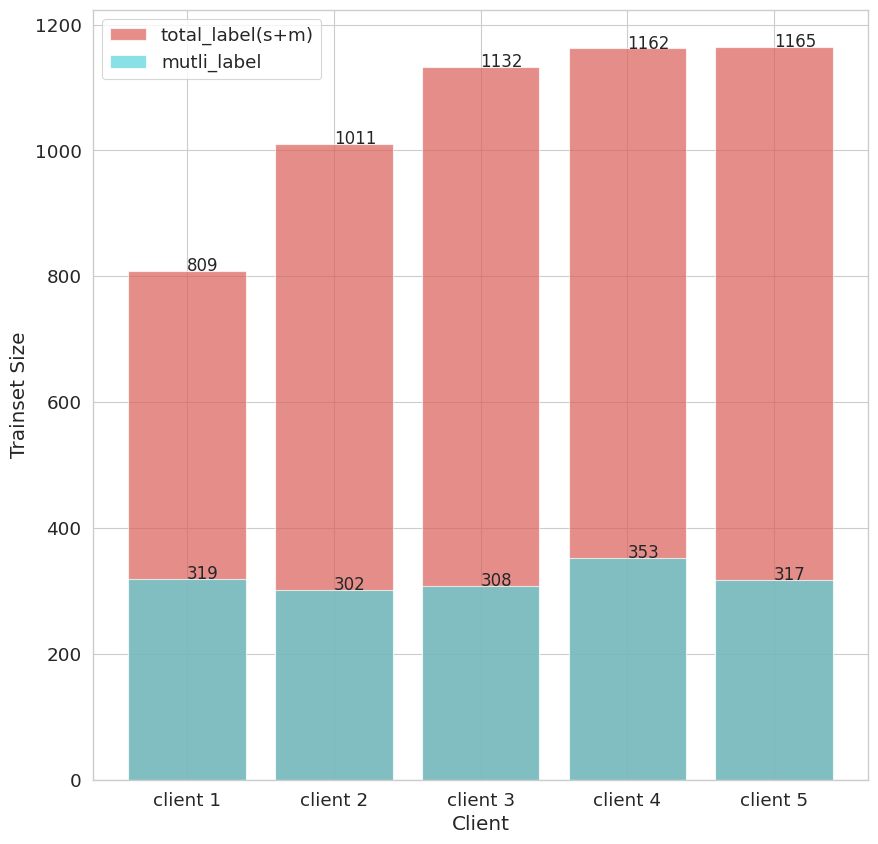

In [12]:
# plot the results
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# task, index, dataset size 
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
# plot testset size for each task
num_tasks = len(df['task'].unique())
# set the color palette
palette = sns.color_palette("hls", num_tasks)
# plot the results

for i, task in enumerate(df['task'].unique()):
    df_task = df[df['task'] == task]
    # ax.plot(df_task['index'], df_task['train_size'], label=task, color=palette[i])
    ax.bar(df_task['index'], df_task['train_size'], label=task, color=palette[i], alpha=0.7)
    # set value on top of the bar
    for j in range(len(df_task['index'])):
        ax.text(df_task['index'].iloc[j], df_task['train_size'].iloc[j], df_task['train_size'].iloc[j], fontsize=12)

tics = ["client 1", "client 2", "client 3", "client 4", "client 5"]
ax.set_xticks(np.arange(len(tics)))
ax.set_xticklabels(tics)
ax.legend()
ax.set_xlabel('Client')
ax.set_ylabel('Trainset Size')
plt.savefig('benchmark_trainset.png', dpi=300)
plt.show()

# # save the figure
# fig.savefig('benchmark.png')

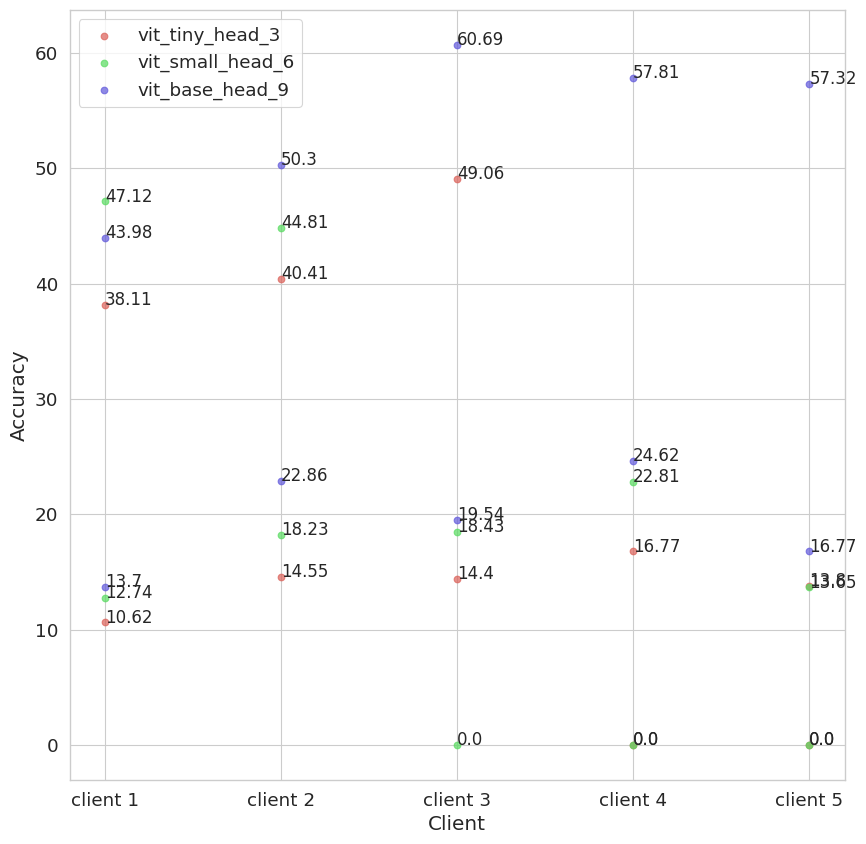

In [13]:
# plot accuracy for each task and each client and each models

fig, ax = plt.subplots(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})

model_names = ['vit_tiny_head_3', 'vit_small_head_6', 'vit_base_head_9']
# set the color palette
palette = sns.color_palette("hls", len(model_names))
# plot the results
for i, model_name in enumerate(model_names):
    df_model = df
    # ax.plot(df_task['index'], df_task['train_size'], label=task, color=palette[i])
    # ax.bar(df_model['index'], df_model[model_name], label=model_name, color=palette[i], alpha=0.7)
    ax.scatter(df_model['index'], df_model[model_name], label=model_name, color=palette[i], alpha=0.7)
    #log scale
    # set value on top of the bar
    for j in range(len(df_model['index'])):
        ax.text(df_model['index'].iloc[j], df_model[model_name].iloc[j], df_model[model_name].iloc[j], fontsize=12)
     
tics = ["client 1", "client 2", "client 3", "client 4", "client 5"]
ax.set_xticks(np.arange(len(tics)))
ax.set_xticklabels(tics)
ax.legend()
ax.set_xlabel('Client')
ax.set_ylabel('Accuracy')
plt.savefig('benchmark_accuracy.png', dpi=300)
plt.show()
